In [1]:
import matplotlib.pyplot as plt

In [2]:
from numpy import genfromtxt
import numpy as np

In [3]:
my_data = genfromtxt('data.csv', delimiter=' ')
my_data = np.asmatrix(my_data)

In [4]:
print(my_data.shape)

(28, 13)


In [5]:
columns_number = my_data.shape[1]
X = my_data[:, 1 : columns_number - 1]
print(X.shape)

(28, 11)


In [6]:
Y = my_data[:, (columns_number - 1)]
print(Y, Y.shape)
m = Y.shape[0]
print(m)

[[25.9]
 [29.5]
 [27.9]
 [25.9]
 [29.9]
 [29.9]
 [30.9]
 [28.9]
 [84.9]
 [82.9]
 [35.9]
 [31.5]
 [31. ]
 [30.9]
 [30. ]
 [28.9]
 [36.9]
 [41.9]
 [40.5]
 [43.9]
 [37.5]
 [37.9]
 [44.5]
 [37.9]
 [38.9]
 [36.9]
 [45.8]
 [41. ]] (28, 1)
28


In [7]:
X = X[:, 3] # выборка жилой площади из данных
print(X)

[[0.998]
 [1.5  ]
 [1.175]
 [1.232]
 [1.121]
 [0.988]
 [1.24 ]
 [1.501]
 [3.42 ]
 [3.   ]
 [1.225]
 [1.552]
 [0.975]
 [1.121]
 [1.02 ]
 [1.501]
 [1.664]
 [1.488]
 [1.376]
 [1.5  ]
 [1.256]
 [1.69 ]
 [1.82 ]
 [1.652]
 [1.777]
 [1.504]
 [1.831]
 [1.2  ]]


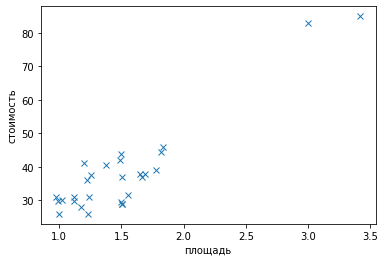

In [8]:
plt.plot(X, Y, 'x')
plt.xlabel('площадь')
plt.ylabel('стоимость')
plt.show()

In [9]:
X = np.append(np.ones((m, 1)), X, 1)

In [10]:
def cost(X, y, theta):
    m = y.shape[0]
    
    J = np.sum(np.square(X * theta - y)) / (2 * m)
    
    return J

theta = np.ones((2,1))
print(theta)
print("Ошибка при данном векторе theta составляет:")
print(cost(X,Y, theta))

[[1.]
 [1.]]
Ошибка при данном векторе theta составляет:
725.1799981607144


In [11]:
theta = np.zeros((2,1))
iterations = 1500
alpha = 0.02
error_level = 0.005

def gradientDescent(X, y, theta, alpha, max_iterations, error_level):
    history = list()
    m = y.shape[0]
    XK = alpha / m * X.T
    for i in range(0, max_iterations):        
        theta -= XK * (X * theta - y)
        
        history.append(cost(X,y,theta))
        
        if len(history) > 2:
            c = len(history)
            if abs(history[c - 1] - history[c - 2]) < error_level:
                break
                
    return theta, history


print(theta)
print("Найденный вектор theta алгоритмом градиентного спуска:")
theta_new, history = gradientDescent(X, Y, theta, alpha, iterations, error_level)
print(theta_new)
print("Ошибка при этом значении theta:")
print(cost(X,Y,theta_new)) # 14.579898115763427


[[0.]
 [0.]]
Найденный вектор theta алгоритмом градиентного спуска:
[[ 7.30075735]
 [20.69419795]]
Ошибка при этом значении theta:
16.050199915417124


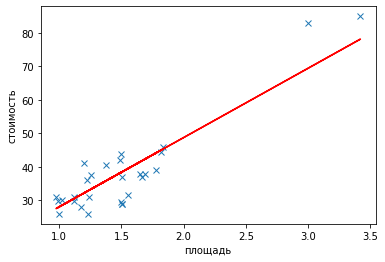

In [12]:
plt.plot(X[:,1], Y, 'x') 
plt.plot(X[:,1], X * theta_new, color='red')

plt.xlabel("площадь")
plt.ylabel("стоимость")
plt.show()

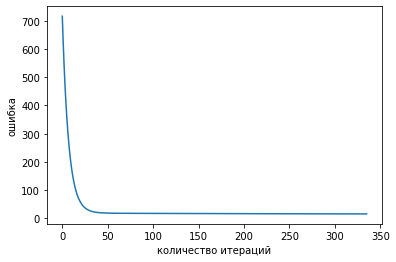

In [13]:
plt.plot(np.arange(len(history)), history)
plt.xlabel("количество итераций")
plt.ylabel("ошибка")
plt.show()

In [14]:
X = my_data[:, 1: (my_data.shape[1] - 1)] 
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.append(np.ones((m,1)), X, 1)

In [15]:
theta = np.zeros((X.shape[1], 1))
print("Найденный вектор theta алгоритмом градиентного спуска:")
theta_new , history = gradientDescent(X, Y, theta, alpha, iterations, error_level)
print(theta_new)
print("Ошибка при этом значении theta:")
print(cost(X, Y, theta_new))
iterations_count = len(history)

Найденный вектор theta алгоритмом градиентного спуска:
[[37.85192641]
 [ 3.28508621]
 [ 3.93888879]
 [ 0.78361931]
 [ 4.29650697]
 [ 0.55153943]
 [ 0.42779002]
 [ 0.22668024]
 [-1.29431077]
 [ 1.16054347]
 [ 0.54573642]
 [ 1.17282627]]
Ошибка при этом значении theta:
5.289123370065292


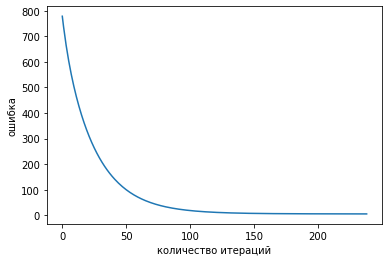

In [16]:
plt.plot(np.arange(iterations_count), history)
plt.xlabel("количество итераций")
plt.ylabel("ошибка")
plt.show()